Ce notebook a pour objectif de faire quelques statistiques descriptives sur le dataframe DVF pour mieux visualiser les données et ensuite, de le coupler aux données de risques d'inondation pour avoir une base de données complète.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install matplotlib_venn
from matplotlib_venn import venn3

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=fdf9c9e73ff31a55a2549f135f17a32b875f140e7cf51564fa9ab226cd8bdbf9
  Stored in directory: /home/onyxia/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib_venn


## Partie 1 : Une première analyse

Tout de suite, nous allons observer rapidement le dataframe pour voir s'il y a des données manquantes et/ou des choses à corriger/ajouter

In [3]:
import pandas as pd

def charger_donnees(chemin_fichier):
    """
    Charge un fichier CSV dans un DataFrame pandas.
    :param chemin_fichier: Chemin du fichier CSV
    :return: DataFrame contenant les données du CSV
    """
    df = pd.read_csv(chemin_fichier)
    df['nombre_dependances'] = df['nombre_dependances'].fillna(0)
    return df

df_initial = charger_donnees("/home/onyxia/work/projet_statapp_inondations-4/data/DVF_avec_risques_inondations.csv")


Ci-dessus, en chargeant la BDD, j'ai remplacé les NaN par des 0 dans la colonne des dépendances.

In [2]:

def statistiques_generales(df):
    """
    Renvoie des statistiques générales sur le DataFrame.
    :param df: DataFrame contenant les données
    :return: DataFrame avec les statistiques descriptives
    """
    return df.describe()

statistiques_generales(df_initial)

NameError: name 'df_initial' is not defined

L'analyse ci-dessus n'a de sens que pour certaines variables. En particulier, la moyenne des codes postal n'a pas vraiment d'intérêt (ni même de sens...)


On remarque que le nombre maximal de dépendances est 160, cela semble étonnamment grand. Plus de 75% des transactions n'impliquent pas de dépendance


On voit ici l'importance d'exclure les valeurs extrêmes : On a une transaction à 4 centimes (?) et une autre dont la surface est 1 m². Ces transactions exceptionnelles n'apportent rien à l'analyse mais pourraient induire en erreur nos résultats.

In [30]:
df_initial.head(10)

,Unnamed: 0.1,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,...,prix_terrain,risque_debordement_fort,risque_debordement_moyen,risque_debordement_faible,risque_submersion_fort,risque_submersion_moyen,risque_submersion_faible,risque_ruissellement_fort,risque_ruissellement_moyen,risque_ruissellement_faible
0,0,0,2019-202011,2019-07-01,1,Vente,161000.00,15.0,NaN,RUE PAUL GAUGUIN,...,1.610000e+05,0,0,0,0,0,0,0,0,0
1,1,1,2019-202020,2019-07-04,1,Vente,539920.00,1781.0,NaN,RTE DE SAUVE,...,7.933417e+04,0,0,0,0,0,0,0,0,0
2,2,2,2019-202020,2019-07-04,1,Vente,539920.00,1781.0,NaN,RTE DE SAUVE,...,7.933417e+04,0,0,0,0,0,0,0,0,0
3,3,3,2019-202020,2019-07-04,1,Vente,539920.00,1821.0,NaN,RTE DE SAUVE,...,3.812517e+05,0,0,0,0,0,0,0,0,0
4,4,4,2019-202021,2019-07-01,1,Vente,99000.00,5264.0,NaN,LA BOUISSONADE ET MONBLADI,...,9.900000e+04,0,0,0,0,0,0,0,0,0
5,5,5,2019-202026,2019-07-01,1,Vente,228222.00,122.0,NaN,RTE DE MARIGNAC,...,2.282220e+05,0,0,0,0,0,0,0,0,0
6,6,6,2019-202027,2019-07-01,1,Vente,380500.00,9.0,NaN,IMP DES SALADELLES,...,3.805000e+05,0,1,1,0,1,1,0,0,0
7,7,7,2019-202036,2019-07-05,1,Vente,1119600.00,2.0,NaN,IMP DE LA PHALENE,...,1.119600e+06,0,0,0,0,0,0,0,0,0
8,8,8,2019-202045,2019-07-04,1,Vente,420800.25,10.0,NaN,CHE DU CIMETIERE VIEUX,...,4.208002e+05,0,0,0,0,0,0,0,0,0
9,9,9,2019-202047,2019-07-02,1,Vente,176000.00,5288.0,NaN,CHE DU MAS DE PIAN,...,1.760000e+05,0,0,0,0,0,0,0,0,0


In [ ]:
def valeurs_manquantes(df):
    """
    Renvoie le nombre de valeurs manquantes par colonne.
    :param df: DataFrame contenant les données
    :return: Série avec le nombre de valeurs manquantes par colonne
    """
    return df.isnull().sum()


valeurs_manquantes(df_initial)

Unnamed: 0.1                        0
Unnamed: 0                          0
id_mutation                         0
date_mutation                       0
numero_disposition                  0
nature_mutation                     0
valeur_fonciere                    69
adresse_numero                    812
adresse_suffixe                106905
adresse_nom_voie                    1
adresse_code_voie                   0
code_postal                         2
nom_commune                         0
code_departement                    0
surface_reelle_bati                 0
nombre_pieces_principales           0
surface_terrain                     2
longitude                        1376
latitude                         1376
prix_maison                        69
nombre_dependances                  0
prix_terrain                       71
risque_debordement_fort             0
risque_debordement_moyen            0
risque_debordement_faible           0
risque_submersion_fort              0
risque_subme

Ci-dessus, on voit que les coordonnées GPS sont manquantes pour 1376 transactions,
il semble pertinent de les supprimer de la base car on ne pourra pas les étudier correctement (de même que les 69 transactions où le prix de vente est indisponible)

In [6]:
def mode_colonnes(df):
    """
    Renvoie le mode (valeur la plus fréquente) de chaque colonne.
    :param df: DataFrame contenant les données
    :return: Série avec le mode de chaque colonne
    """
    return df.mode().iloc[0]


mode_colonnes(df_initial)

Unnamed: 0.1                             0
Unnamed: 0                               0
id_mutation                    2021-132350
date_mutation                   2021-07-28
numero_disposition                     1.0
nature_mutation                      Vente
valeur_fonciere                   200000.0
adresse_numero                         1.0
adresse_suffixe                          B
adresse_nom_voie                LE VILLAGE
adresse_code_voie                     0020
code_postal                        34500.0
nom_commune                          Nîmes
code_departement                      34.0
surface_reelle_bati                   90.0
nombre_pieces_principales              4.0
surface_terrain                      500.0
longitude                         3.049139
latitude                         43.013674
prix_maison                       200000.0
nombre_dependances                     0.0
prix_terrain                      200000.0
risque_debordement_fort                0.0
risque_debo

## Partie 2 : Un premier nettoyage

On vient de voir qu'il est nécessaire de supprimer certaines observations avant de pouvoir analyser plus précisément notre BDD. Ici, on va s'occuper de supprimer les observations où une information importante est indisponible. De même, on va rajouter la colonne prix_par_metre_carre qui nous servira de variables de références pour supprimer les observations atypiques.

In [23]:
def supprimer_lignes_vides(df):
    """
    Supprime les lignes où les variables prix_maison ou longitude ne sont pas définies.
    :param df: DataFrame contenant les données
    :return: DataFrame sans les lignes avec prix_maison ou longitude manquantes
    """
    df = df.dropna(subset=['prix_maison', 'longitude', 'surface_terrain'])
    
    return df

df_sans_vide = supprimer_lignes_vides(df_initial)


valeurs_manquantes(df_sans_vide)


Unnamed: 0.1                        0
Unnamed: 0                          0
id_mutation                         0
date_mutation                       0
numero_disposition                  0
nature_mutation                     0
valeur_fonciere                     0
adresse_numero                    801
adresse_suffixe                105526
adresse_nom_voie                    1
adresse_code_voie                   0
code_postal                         2
nom_commune                         0
code_departement                    0
surface_reelle_bati                 0
nombre_pieces_principales           0
surface_terrain                     0
longitude                           0
latitude                            0
prix_maison                         0
nombre_dependances                  0
prix_terrain                        0
risque_debordement_fort             0
risque_debordement_moyen            0
risque_debordement_faible           0
risque_submersion_fort              0
risque_subme

In [24]:
def creer_prix_par_metre_carre(df):
    """
    Crée une variable prix_par_metre_carre en divisant le prix_maison par la surface du terrain.
    :param df: DataFrame contenant les données
    :return: DataFrame avec la colonne prix_par_metre_carre ajoutée
    """
    df['prix_par_metre_carre'] = df['prix_maison'] / df['surface_reelle_bati']
    return df

df_sans_vide = creer_prix_par_metre_carre(df_sans_vide)



valeurs_manquantes(df_sans_vide)

/tmp/ipykernel_205107/3866396767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_par_metre_carre'] = df['prix_maison'] / df['surface_reelle_bati']


Unnamed: 0.1                        0
Unnamed: 0                          0
id_mutation                         0
date_mutation                       0
numero_disposition                  0
nature_mutation                     0
valeur_fonciere                     0
adresse_numero                    801
adresse_suffixe                105526
adresse_nom_voie                    1
adresse_code_voie                   0
code_postal                         2
nom_commune                         0
code_departement                    0
surface_reelle_bati                 0
nombre_pieces_principales           0
surface_terrain                     0
longitude                           0
latitude                            0
prix_maison                         0
nombre_dependances                  0
prix_terrain                        0
risque_debordement_fort             0
risque_debordement_moyen            0
risque_debordement_faible           0
risque_submersion_fort              0
risque_subme

Maintenant, on va regarder plus en détails la distribution du prix par mètre carré pour voir s'il est nécessaire d'éliminer les valeurs aberrantes. 

In [25]:
def distribution_valeurs(df, colonne):
    """
    Renvoie la distribution des valeurs uniques d'une colonne.
    :param df: DataFrame contenant les données
    :param colonne: Nom de la colonne à analyser
    :return: Série avec la distribution des valeurs uniques
    """
    if colonne in df.columns:
        return df[colonne].value_counts()
    else:
        return f"La colonne '{colonne}' n'existe pas dans le DataFrame."

statistiques_generales(df_sans_vide["prix_par_metre_carre"])

count     113856.000000
mean        2502.959711
std         4408.613430
min            0.000734
25%         1469.007684
50%         2256.410256
75%         3125.000000
max      1000000.000000
Name: prix_par_metre_carre, dtype: float64

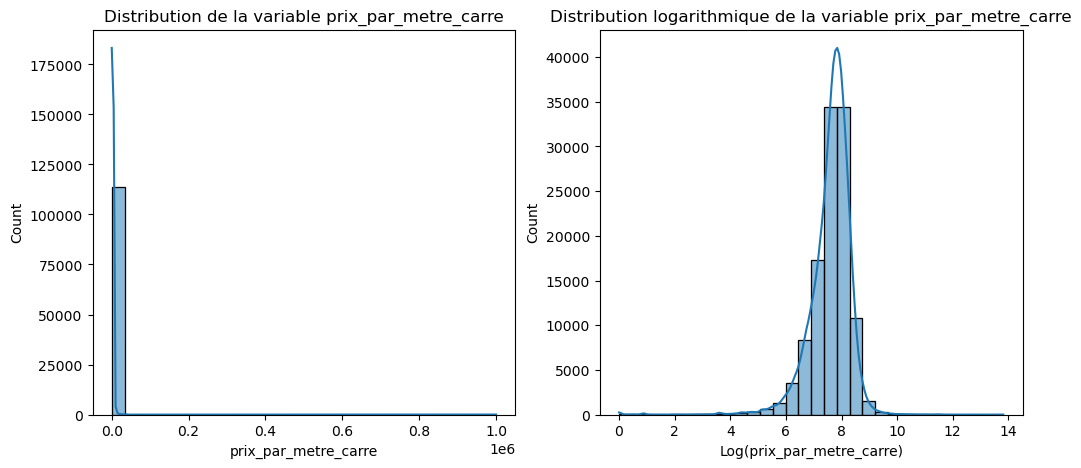

In [31]:
def visualiser_distributions(df,colonne):
    """
    Affiche des graphiques de distribution pour les variables prix_maison et surface_terrain.
    :param df: DataFrame contenant les données
    """
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[colonne], bins=30, kde=True)
    plt.title("Distribution de la variable " + colonne )
    plt.xlabel(colonne)
    
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df[colonne]), bins=30, kde=True)
    plt.title("Distribution logarithmique de la variable " + colonne)
    plt.xlabel("Log(" + colonne + ")")
    
    plt.show()

visualiser_distributions(df_sans_vide, "prix_par_metre_carre")


On supprime les observations ayant une valeur extrême (les 2% plus petits et plus grands) pour la variable prix_par_metre_carre

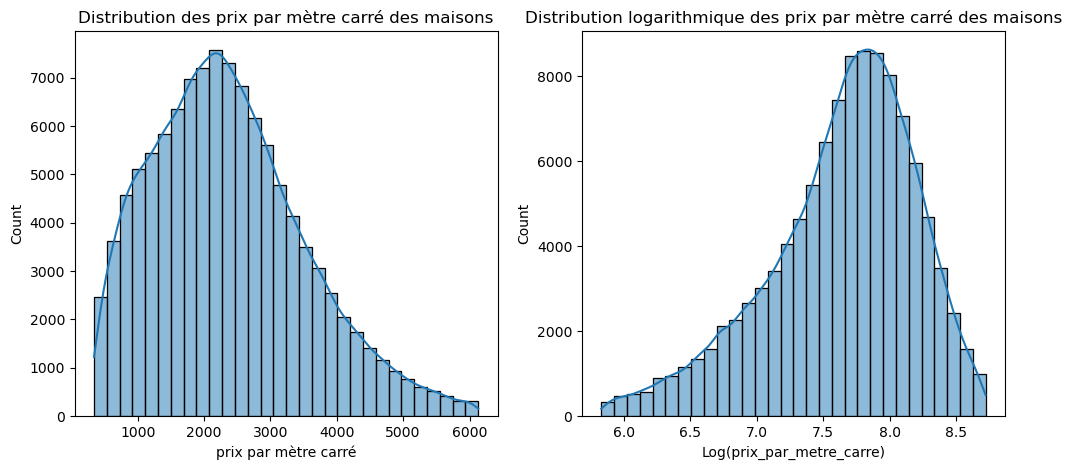

In [44]:
def supprimer_valeurs_aberrantes(df):
    """
    Supprime les 2% les plus faibles et les plus élevés des observations sur la variable prix_par_metre_carre.
    :param df: DataFrame contenant les données
    :return: DataFrame sans les valeurs aberrantes
    """
    quantiles = df['prix_par_metre_carre'].quantile([0.02, 0.98])
    df = df[(df['prix_par_metre_carre'] >= quantiles.iloc[0]) & (df['prix_par_metre_carre'] <= quantiles.iloc[1])]
    return df

df_v2 = supprimer_valeurs_aberrantes(df_sans_vide)


visualiser_distributions(df_v2, "prix_par_metre_carre")

Pas mal non ?

## Partie 3 : Une deuxième analyse


Maintenant que nous avons fait ce nettoyage, on espère avoir supprimé les transactions aberrantes de notre base de données. Pour vérifier cela, on va reprendre nos fonctions de statistiques descriptives pour voir les valeurs minimales et maximales des variables quantitatives.
Une fois cela fait, on analysera par département nos variables pour voir s'il y a des différences significatives entre départements

In [48]:
statistiques_generales(df_v2)

,Unnamed: 0.1,Unnamed: 0,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,...,risque_debordement_fort,risque_debordement_moyen,risque_debordement_faible,risque_submersion_fort,risque_submersion_moyen,risque_submersion_faible,risque_ruissellement_fort,risque_ruissellement_moyen,risque_ruissellement_faible,prix_par_metre_carre
count,109300.000000,109300.000000,109300.000000,1.093000e+05,108562.000000,109298.000000,109300.000000,109300.000000,109300.000000,109300.000000,...,109300.000000,109300.000000,109300.000000,109300.000000,109300.000000,109300.000000,109300.0,109300.0,109300.0,109300.000000
mean,57599.951638,57599.951638,1.012470,2.786053e+05,874.985105,27525.983595,27.147109,99.537210,4.029588,572.805544,...,0.016487,0.053888,0.079387,0.003614,0.023184,0.036185,0.0,0.0,0.0,2372.396613
std,33241.140184,33241.140184,0.121066,4.637161e+05,2071.881188,9335.159930,9.279541,43.289974,1.374351,2015.010115,...,0.127338,0.225798,0.270343,0.060007,0.150488,0.186751,0.0,0.0,0.0,1155.468042
min,0.000000,0.000000,1.000000,5.000000e+03,1.000000,11000.000000,11.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,339.622642
25%,28889.750000,28889.750000,1.000000,1.366000e+05,7.000000,30000.000000,30.000000,74.000000,3.000000,142.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1502.699905
50%,57574.500000,57574.500000,1.000000,2.200000e+05,21.000000,30640.000000,30.000000,93.000000,4.000000,374.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2256.410256
75%,86390.250000,86390.250000,1.000000,3.230000e+05,159.000000,34360.000000,34.000000,118.000000,5.000000,602.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,3076.923077
max,115302.000000,115302.000000,8.000000,8.500000e+06,9999.000000,34990.000000,34.000000,1340.000000,70.000000,45191.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,6132.075472


On remarque plusieurs choses, déjà le nombre d'observations est passé de 113856 à 109300 ce qui est parfaitement cohérent car 113856 * 0.96 = 109300.

On a toujours plus de 75% des transactions sans dépendance mais le maximum est passé de 160 à 27

Mais on a toujours des transactions... surprenantes ! Par exemple, une avec une surface totale de 2m ou encore une avec un prix de vente de 510€...

In [46]:
def compter_surface_inferieure_bati(df):
    """
    Compte le nombre d'observations où la surface du terrain est inférieure stricte à la surface réelle bâtie.
    :param df: DataFrame contenant les données
    :return: Nombre d'observations correspondantes
    """
    return (df['surface_terrain'] < df['surface_reelle_bati']).sum()

def compter_surface_egale_bati(df):
    """
    Compte le nombre d'observations où la surface du terrain est inférieure stricte à la surface réelle bâtie.
    :param df: DataFrame contenant les données
    :return: Nombre d'observations correspondantes
    """
    return (df['surface_terrain'] == df['surface_reelle_bati']).sum()

def compter_surface_superieur_bati(df):
    """
    Compte le nombre d'observations où la surface du terrain est inférieure stricte à la surface réelle bâtie.
    :param df: DataFrame contenant les données
    :return: Nombre d'observations correspondantes
    """
    return (df['surface_terrain'] > df['surface_reelle_bati']).sum()



print(compter_surface_inferieure_bati(df_v2))

print(compter_surface_egale_bati(df_v2))

print(compter_surface_superieur_bati(df_v2))

15399
803
93098


In [16]:
def trouver_surface_minimale(df, surface_minimale=2):
    """
    Trouve les lignes où la surface du terrain est égale à une valeur spécifique.
    :param df: DataFrame contenant les données
    :param surface_minimale: Valeur spécifique de la surface à rechercher (par défaut : 2)
    :return: DataFrame avec les lignes correspondantes
    """
    result = df[df['surface_terrain'] == surface_minimale]
    return result


resultat = trouver_surface_minimale(df_v2)
print(resultat)

       Unnamed: 0.1  Unnamed: 0  id_mutation date_mutation  \
19128         19128       19128  2020-368524    2020-08-18   
39026         39026       39026  2021-135202    2021-10-19   
41724         41724       41724  2021-437381    2021-03-18   

       numero_disposition nature_mutation  valeur_fonciere  adresse_numero  \
19128                   1           Vente         220000.0            15.0   
39026                   1           Vente         151600.0             3.0   
41724                   1           Vente         160000.0            70.0   

      adresse_suffixe   adresse_nom_voie  ... risque_debordement_fort  \
19128             NaN          RUE HOCHE  ...                       0   
39026             NaN  RUE LOUIS BRAILLE  ...                       0   
41724             NaN   CHE DES MATTETES  ...                       0   

       risque_debordement_moyen risque_debordement_faible  \
19128                         0                         1   
39026                  

In [47]:
df_v2.to_csv('DVF_avec_risques_inondations_propre.csv', index=False)

In [30]:
mode_colonnes(df_v2)

Unnamed: 0                             0
id_mutation                  2021-132350
date_mutation                 2021-07-28
numero_disposition                   1.0
nature_mutation                    Vente
valeur_fonciere                 200000.0
adresse_numero                       2.0
adresse_suffixe                        B
adresse_nom_voie              LE VILLAGE
adresse_code_voie                   0020
code_postal                      34500.0
nom_commune                        Nîmes
code_departement                    34.0
surface_reelle_bati                 90.0
nombre_pieces_principales            4.0
surface_terrain                    500.0
longitude                       3.049139
latitude                       43.013674
prix_maison                     200000.0
nombre_dependances                   0.0
prix_par_metre_carre              2000.0
Name: 0, dtype: object

## Partie 4 : Analyses descriptives des autres variables


### Avant-propos et contexte

Après avoir discuté ensemble, nous avons fait remonté plusieurs valeurs aberrantes dans les min et les max de plusieurs variables. L'idée de cette partie est d'afficher les distributions ainsi que des informations comme la moyenne, les quantiles, etc... de plusieurs variables. 

L'objectif est de voir si les valeurs aberrantes observées sont ultra-minoritaires ou non. On pourra ensuite conclure sur la nécessité de faire un second nettoyage de nos données


Nous allons ici étudier la base de données des transactions contenant en plus les distances à la rivière, au centre-ville, aux littoraux ainsi que les indicatrices de risque d'inondation après le premier nettoyage (voir Partie 2 de ce notebook). Cette base de données se trouve dans le dossier data du Git sous le nom "DVF_avec_distances_mairies.csv"

In [3]:
dvf_mairie = pd.read_csv("/home/onyxia/work/projet_statapp_inondations-8/data/DVF_avec_distances_mairies.csv")


In [4]:
def statistiques_colonne(df, colonne, binaire, dep):
    #Renvoie les statistiques générales de la colonne colonne du dataframe df
    #Le paramètre binaire vaut True si la colonne à décrire est binaire, False sinon
    #dep est une variable booléenne indiquant si l'on souhaite avec les statistiques par département ou non


    if not(binaire) :

        if not(dep):
            print("Statistiques générales sur la variable " + colonne + " \n")
            print(df[colonne].describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))

        else :

            #Dans ce cas, on construit un dataframe où la variable est clusterisée en fonction du département de la transaction
            # Attention, il faut absolument commencer par l'Hérault car c'est le département contenant le plus de transactions
            df_resultat = pd.DataFrame()
            df_resultat[colonne + "_Hérault"] = df[df["code_departement"] == 34][colonne].reset_index(drop=True)
            df_resultat[colonne + "_Gard"] = df[df["code_departement"] == 30][colonne].reset_index(drop=True)
            df_resultat[colonne + "_Aude"] = df[df["code_departement"] == 11][colonne].reset_index(drop=True)
            print("Statistiques générales sur la variable " + colonne + " clusterisé par le département \n")
            print(df_resultat.describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))

    else:
        if not(dep):

            proportions = df[colonne].value_counts(normalize=True)
            print("\nProportions des valeurs 0 et 1 :\n")
            print(proportions)
            taux_1 = df[colonne].mean()
            print(f"\nTaux de 1 : {taux_1:.2f}")
            print("-" * 50)

        else:

            #Dans ce cas, on construit un dataframe où la variable est clusterisée en fonction du département de la transaction
            # Attention, il faut absolument commencer par l'Hérault car c'est le département contenant le plus de transactions
            df_her = pd.DataFrame()
            df_gar = pd.DataFrame()
            df_aud = pd.DataFrame()

            df_her[colonne] = df[df["code_departement"] == 34][colonne]
            df_gar[colonne] = df[df["code_departement"] == 30][colonne]
            df_aud[colonne] = df[df["code_departement"] == 11][colonne]
            
            proportions = df_her[colonne].value_counts(normalize=True)
            print("\nProportions des valeurs 0 et 1 dans l'Hérault :\n")
            print(proportions)
            taux_1 = df_her[colonne].mean()
            print(f"\nTaux de 1 dans l'Hérault : {taux_1:.2f}")
            print("-" * 50)

            proportions = df_gar[colonne].value_counts(normalize=True)
            print("\nProportions des valeurs 0 et 1 dans le Gard :\n")
            print(proportions)
            taux_1 = df_gar[colonne].mean()
            print(f"\nTaux de 1 dans le Gard : {taux_1:.2f}")
            print("-" * 50)

            proportions = df_aud[colonne].value_counts(normalize=True)
            print("\nProportions des valeurs 0 et 1 dans l'Aude :\n")
            print(proportions)
            taux_1 = df_aud[colonne].mean()
            print(f"\nTaux de 1 dans l'Aude : {taux_1:.2f}")
            print("-" * 50)

def distribution(df, colonne, binaire,dep):
    #Permet de visualiser la variable colonne du dataframe df.
    #Le paramètre binaire vaut True si la colonne à décrire est binaire, False sinon
    #dep est une variable booléenne indiquant si l'on souhaite avec les statistiques par département ou non

    if not(binaire):

        if not(dep):

            plt.figure(figsize=(10, 6))
            sns.histplot(df[colonne], bins=30, kde=True, color='thistle')

            moyenne = df[colonne].mean()
            quantile_bas = df[colonne].quantile(0.05)
            quantile_haut = df[colonne].quantile(0.95)

            # Ligne de la moyenne
            plt.axvline(moyenne, color='red', linestyle='--', label=f'Moyenne: {moyenne:.2f}')

            # Zones grisées pour les valeurs extrêmes
            plt.axvspan(df[colonne].min(), quantile_bas, color='gray', alpha=0.3, label='Quantile < 5%')
            plt.axvspan(quantile_haut, df[colonne].max(), color='gray', alpha=0.3, label='Quantile > 95%')

            plt.xlabel(colonne)
            plt.ylabel('Fréquence')
            plt.title("Distribution de la variable " + colonne)
            plt.legend()
            plt.grid(True)
            plt.show()

        else:
            
            df_her = pd.DataFrame()
            df_gar = pd.DataFrame()
            df_aud = pd.DataFrame()

            df_her[colonne] = df[df["code_departement"] == 34][colonne]
            df_gar[colonne] = df[df["code_departement"] == 30][colonne]
            df_aud[colonne] = df[df["code_departement"] == 11][colonne]

            count_her, bins_her = np.histogram(df_her[colonne], bins=40)
            bin_centers_her = 0.5 * (bins_her[1:] + bins_her[:-1])
            plt.plot(bin_centers_her, count_her, color="blue", label=f'Hérault')

            count_gar, bins_gar = np.histogram(df_gar[colonne], bins=40)
            bin_centers_gar = 0.5 * (bins_gar[1:] + bins_gar[:-1])
            plt.plot(bin_centers_gar, count_gar, color="red", label=f'Gard')

            count_aud, bins_aud = np.histogram(df_aud[colonne], bins=40)
            bin_centers_aud = 0.5 * (bins_aud[1:] + bins_aud[:-1])
            plt.plot(bin_centers_aud, count_aud, color="green", label=f'Aude')

            moyenne_her = df_her[colonne].mean()
            plt.axvline(moyenne_her, color="blue", linestyle='--', label=f"Moyenne de l'Hérault: {moyenne_her:.2f}")

            moyenne_gar = df_gar[colonne].mean()
            plt.axvline(moyenne_gar, color="red", linestyle='--', label=f"Moyenne du Gard: {moyenne_gar:.2f}")

            moyenne_aud = df_aud[colonne].mean()
            plt.axvline(moyenne_aud, color="green", linestyle='--', label=f"Moyenne de l'Aude: {moyenne_aud:.2f}")

            plt.xlabel(colonne)
            plt.ylabel('Fréquence')
            plt.title('Distribution de la variable ' + colonne + ' par département')
            plt.legend()
            plt.grid(True)
            plt.show()

    else :
        data_plot = []
        df_her = pd.DataFrame()
        df_gar = pd.DataFrame()
        df_aud = pd.DataFrame()

        df_her[colonne] = df[df["code_departement"] == 34][colonne]
        df_gar[colonne] = df[df["code_departement"] == 30][colonne]
        df_aud[colonne] = df[df["code_departement"] == 11][colonne]
        
        count_0_her = (df_her[colonne] == 0).sum()
        count_1_her = (df_her[colonne] == 1).sum()
        data_plot.append(["Hérault", count_0_her, count_1_her])  

        count_0_gar = (df_gar[colonne] == 0).sum()
        count_1_gar = (df_gar[colonne] == 1).sum()
        data_plot.append(["Gard", count_0_gar, count_1_gar])   

        count_0_aud = (df_aud[colonne] == 0).sum()
        count_1_aud = (df_aud[colonne] == 1).sum()
        data_plot.append(["Aude", count_0_aud, count_1_aud])

        print(data_plot)

        
        df_visu = pd.DataFrame(data_plot, columns=['Département', '0', '1'])
        df_visu.set_index('Département', inplace=True)


        df_visu.plot(kind='bar', color=['lightgreen', 'lightpink'])
        plt.xlabel("Département")
        plt.ylabel("Nombre d'observations")
        plt.title(f"Distribution de {colonne} par département")
        plt.legend(title=colonne, labels=['0', '1'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        colors = ['lightgreen', 'lightpink']
        
        df_visu.loc["Hérault"].plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[0])
        axes[0].set_title(f"Département de l'Hérault")
        axes[0].set_ylabel('')

        df_visu.loc["Gard"].plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[1])
        axes[1].set_title(f"Département du Gard")
        axes[1].set_ylabel('')

        df_visu.loc["Aude"].plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[2])
        axes[2].set_title(f"Département de l'Aude")
        axes[2].set_ylabel('')

        plt.suptitle(f"Répartition de {colonne} par département")
        plt.show()
        

In [43]:
def visualisation_risques(df, risque, dep, num = 0):
    #Affiche des graphiques pour pouvoir analyser les différents niveaux de risque

    if not(dep):

        # Calcul des proportions
        total = len(df)
        faible = df[risque + "_faible"].sum() / total * 100
        moyen = df[risque + "_moyen"].sum() / total * 100
        fort = df[risque + "_fort"].sum() / total * 100

        valeurs = [faible, moyen, fort]
        labels = ["Faible", "Moyen", "Fort"]
        colors = ["lightgreen", "peachpuff", "salmon"]
        
        plt.figure(figsize=(8, 5))
        plt.bar(labels, valeurs, color=colors)
        plt.ylabel("Pourcentage (%)")

        if num==11:
            plt.title("Répartition des différents niveaux de la variable "+ risque +" dans l'Aude ")
        if num==30:
            plt.title("Répartition des différents niveaux de la variable "+ risque +" dans le Gard ")
        if num==34:
            plt.title("Répartition des différents niveaux de la variable "+ risque +" dans l'Hérault " )      
        if num==0:
            plt.title("Répartition des différents niveaux de la variable "+ risque +"")

        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        #Diagramme de Venn
        plt.figure(figsize=(6, 6))
        venn3(subsets=(
            df[(df[risque + "_faible"] == 1) & (df[risque + "_moyen"] == 0) & (df[risque + "_fort"] == 0)].shape[0],  # Faible
            df[(df[risque + "_faible"] == 0) & (df[risque + "_moyen"] == 1) & (df[risque + "_fort"] == 0)].shape[0],  # Moyen
            df[(df[risque + "_faible"] == 1) & (df[risque + "_moyen"] == 1) & (df[risque + "_fort"] == 0)].shape[0],  # Faible + Moyen
            df[(df[risque + "_faible"] == 0) & (df[risque + "_moyen"] == 0) & (df[risque + "_fort"] == 1)].shape[0],  # Fort
            df[(df[risque + "_faible"] == 1) & (df[risque + "_moyen"] == 0) & (df[risque + "_fort"] == 1)].shape[0],  # Faible + Fort
            df[(df[risque + "_faible"] == 0) & (df[risque + "_moyen"] == 1) & (df[risque + "_fort"] == 1)].shape[0],  # Moyen +  Fort
            df[(df[risque + "_faible"] == 1) & (df[risque + "_moyen"] == 1) & (df[risque + "_fort"] == 1)].shape[0]   # Faible + Moyen +  Fort
        ), set_labels=('Faible', 'Moyen', 'Fort'), alpha=0.5)

        if num==11:
            plt.title("Diagramme de Venn des différents niveaux de la variable "+ risque +" dans l'Aude ")
        if num==30:
            plt.title("Diagramme de Venn des différents niveaux de la variable "+ risque + " dans le Gard ")
        if num==34:
            plt.title("Diagramme de Venn des différents niveaux de la variable " + risque +" dans l'Hérault ")      
        if num==0:
            plt.title("Diagramme de Venn des différents niveaux de la variable " + risque)
        plt.show()

    else:

        df_her = pd.DataFrame()
        df_gar = pd.DataFrame()
        df_aud = pd.DataFrame()

        df_her = df[df["code_departement"] == 34]
        df_gar = df[df["code_departement"] == 30]
        df_aud = df[df["code_departement"] == 11]

        # Affichage des graphiques pour chaque département en 3 colonnes

        visualisation_risques(df_her, risque, False, 34)

        visualisation_risques(df_gar, risque, False, 30)

        visualisation_risques(df_aud, risque, False, 11)

        plt.show()


### 4.1 : Distribution du prix par mètre carré

In [7]:
statistiques_colonne(dvf_mairie, "prix_par_metre_carre", False, False)

Statistiques générales sur la variable prix_par_metre_carre 

count    101651.000000
mean       2379.089594
std        1151.493744
min         339.622642
10%         938.931298
20%        1339.957653
30%        1686.666667
40%        1988.505747
50%        2267.857143
60%        2557.333333
70%        2888.888889
80%        3312.500000
90%        3950.000000
max        6132.075472
Name: prix_par_metre_carre, dtype: float64


In [8]:
statistiques_colonne(dvf_mairie, "prix_par_metre_carre", False, True)

Statistiques générales sur la variable prix_par_metre_carre clusterisé par le département 

       prix_par_metre_carre_Hérault  prix_par_metre_carre_Gard  \
count                  44565.000000               32332.000000   
mean                    2723.436922                2445.988953   
std                     1222.895922                 993.801616   
min                      340.136054                 342.857143   
10%                     1125.000000                1200.000000   
20%                     1609.752878                1619.303636   
30%                     2000.000000                1911.111111   
40%                     2331.181818                2164.259844   
50%                     2651.020408                2385.368884   
60%                     2984.615385                2613.861386   
70%                     3340.000000                2863.636364   
80%                     3774.600899                3187.500000   
90%                     4388.888889               

Ici, il est intéressant de voir que la moyenne du prix par mètre carré diffère significativement par département. Et l'ordre est le même que celui observé en réalité : D'après des données trouvées sur le net, le prix par mètre carré moyen est de 2062€ dans l'Aude, 2572€ pour le Gard et 3201€ pour l'Hérault.

Pour les valeurs extrêmes, on retrouve des valeurs similaires pour les trois départements : Autour de 340€ pour le minimum et autour de 6130€ pour le maximum.

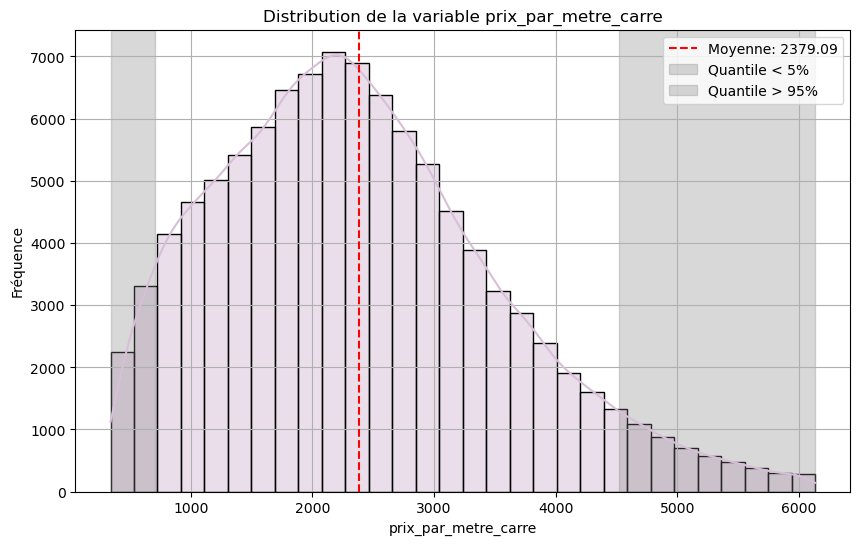

In [9]:
distribution(dvf_mairie, "prix_par_metre_carre", False, False)

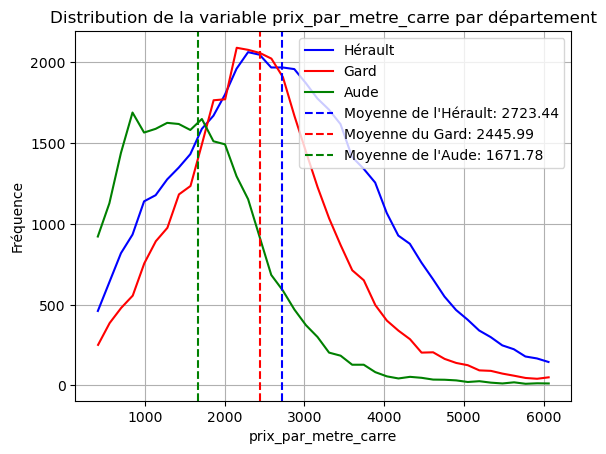

In [10]:
distribution(dvf_mairie, "prix_par_metre_carre", False, True)

### 4.2 : Distribution de l'indicatrice de risque de débordement



In [11]:
statistiques_colonne(dvf_mairie, "risque_debordement_faible", True, False)


Proportions des valeurs 0 et 1 :

risque_debordement_faible
0    0.920562
1    0.079438
Name: proportion, dtype: float64

Taux de 1 : 0.08
--------------------------------------------------


In [12]:
statistiques_colonne(dvf_mairie, "risque_debordement_faible", True, True)


Proportions des valeurs 0 et 1 dans l'Hérault :

risque_debordement_faible
0    0.921508
1    0.078492
Name: proportion, dtype: float64

Taux de 1 dans l'Hérault : 0.08
--------------------------------------------------

Proportions des valeurs 0 et 1 dans le Gard :

risque_debordement_faible
0    0.924378
1    0.075622
Name: proportion, dtype: float64

Taux de 1 dans le Gard : 0.08
--------------------------------------------------

Proportions des valeurs 0 et 1 dans l'Aude :

risque_debordement_faible
0    0.913873
1    0.086127
Name: proportion, dtype: float64

Taux de 1 dans l'Aude : 0.09
--------------------------------------------------


[['Hérault', np.int64(41067), np.int64(3498)], ['Gard', np.int64(29887), np.int64(2445)], ['Aude', np.int64(22622), np.int64(2132)]]


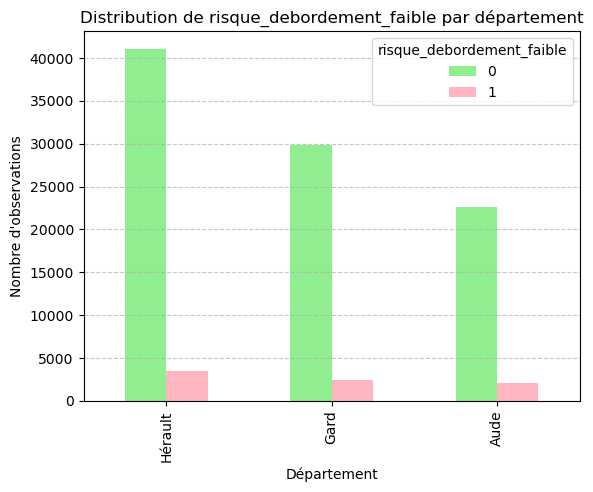

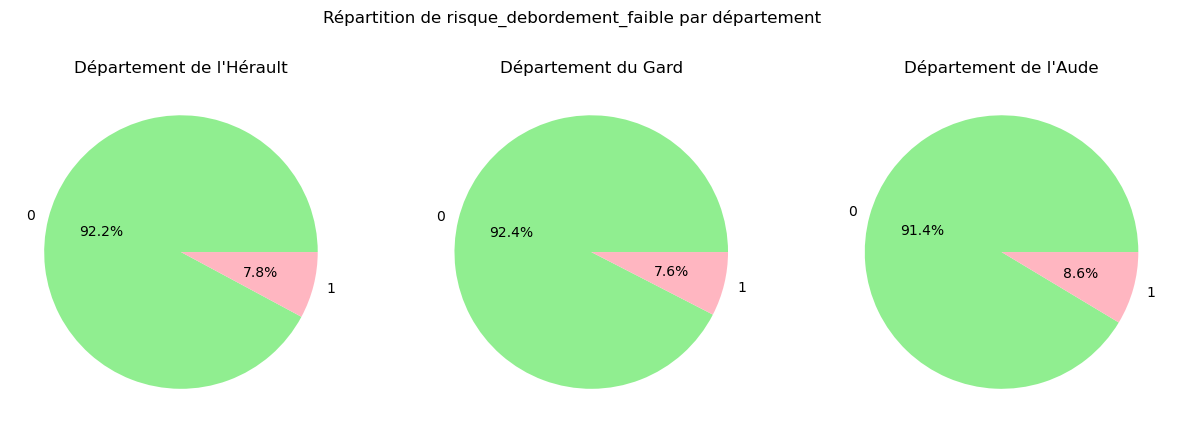

In [13]:
distribution(dvf_mairie,"risque_debordement_faible", True, False)

[['Hérault', np.int64(41967), np.int64(2598)], ['Gard', np.int64(31105), np.int64(1227)], ['Aude', np.int64(23102), np.int64(1652)]]


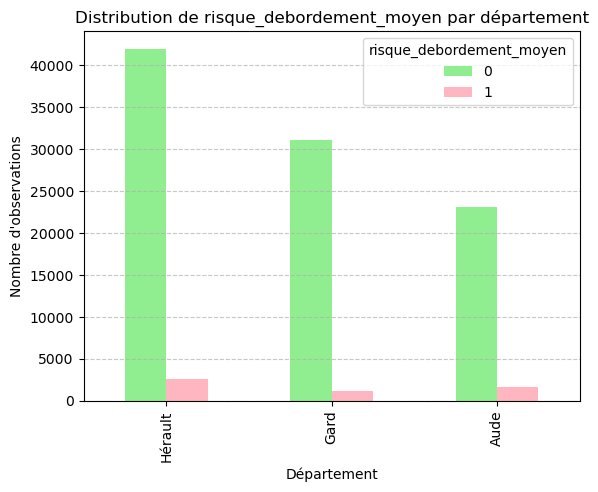

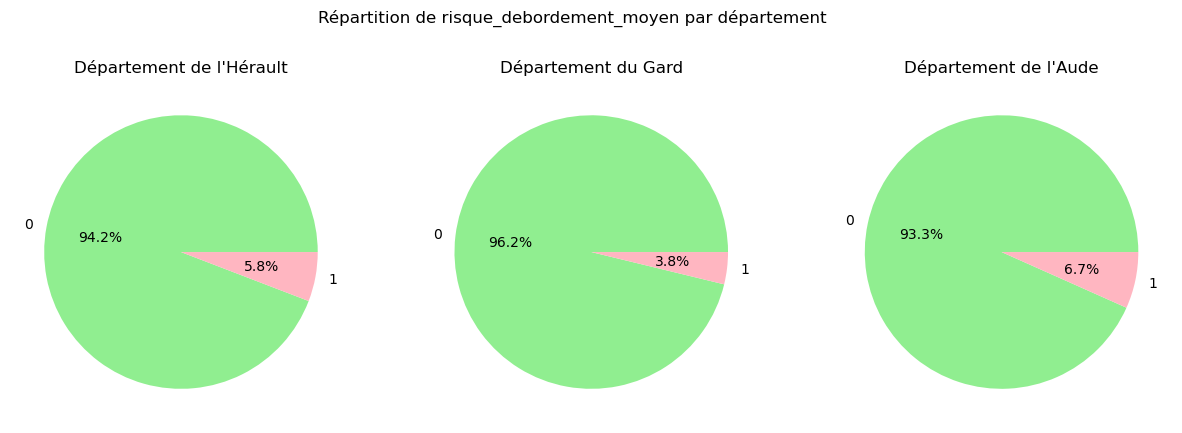

In [15]:
distribution(dvf_mairie,"risque_debordement_moyen", True, False)

[['Hérault', np.int64(43306), np.int64(1259)], ['Gard', np.int64(32097), np.int64(235)], ['Aude', np.int64(24544), np.int64(210)]]


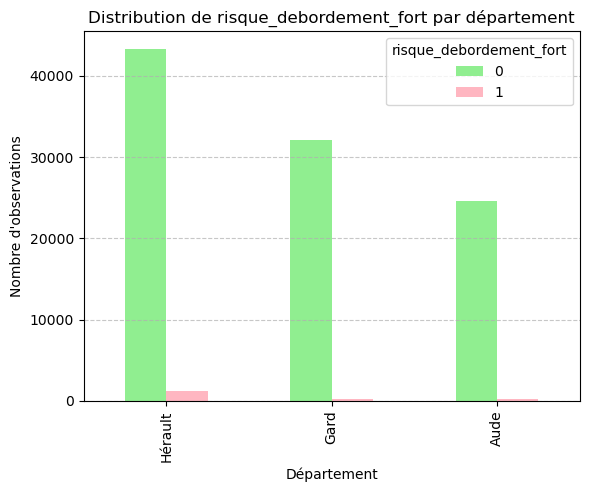

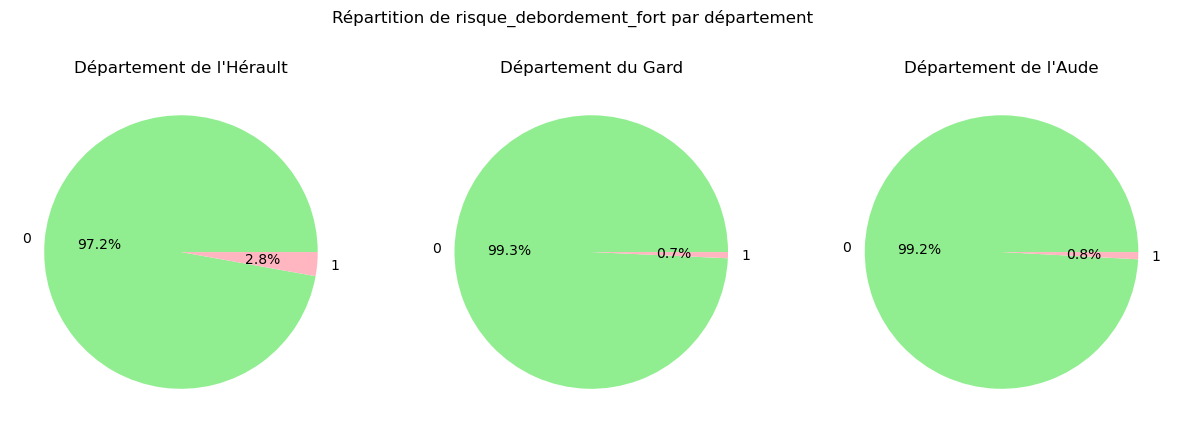

In [16]:
distribution(dvf_mairie,"risque_debordement_fort", True, False)

On remarque ici que le risque de débordement faible est assez bien réparti entre les trois départements. On a 8% des transactions qui possèdent un risque faible de débordement

En revanche, pour les deux autres niveaux de risque, c'est moins bien réparti entre les départements. Et l'inégalité n'est pas dans le même sens pour les deux niveaux : Pour le niveau moyen, l'Aude en possède le plus, suivie de l'Hérault et du Gard ; Pour le niveau fort, c'est l'Hérault qui en possède trois fois plus que l'Aude et le Gard.

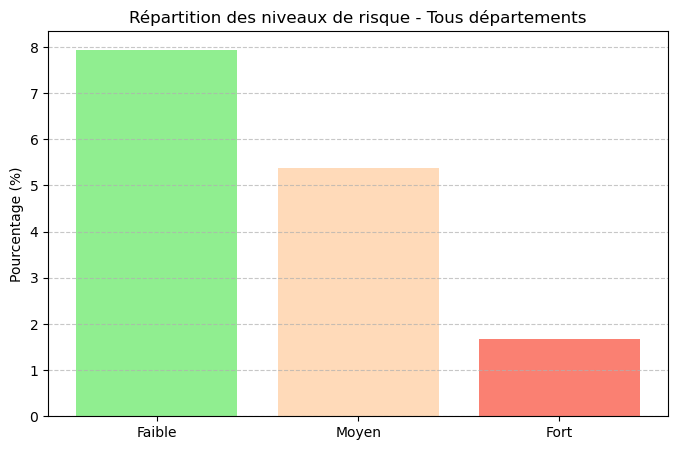

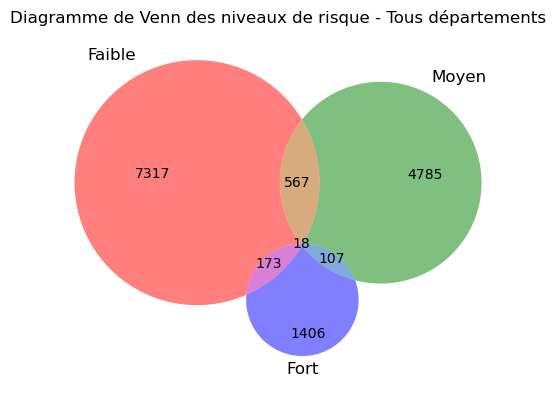

In [14]:
visualisation_risques(dvf_mairie, "risque_debordement", False)

Ici, on a un résultat frappant et inattendu : On n'a pas d'inclusion des niveaux de risque de débordement. Dans la majeure partie des cas, Faible n'implique pas Moyen et Moyen n'implique pas fort.

Ce n'est pas une mauvaise chose en soit mais il va bien falloir garder à l'esprit cette caractéristique de notre base de données qui est pour le moins contre-intuitive.

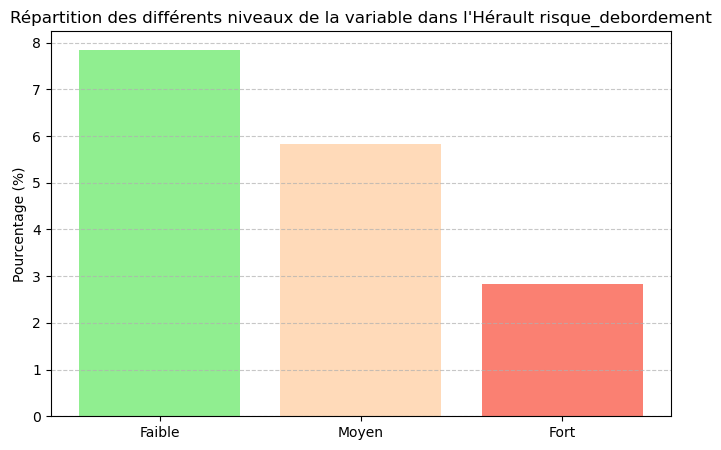

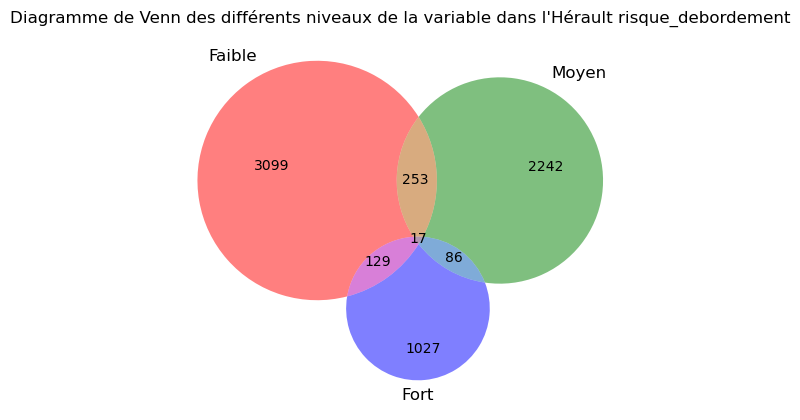

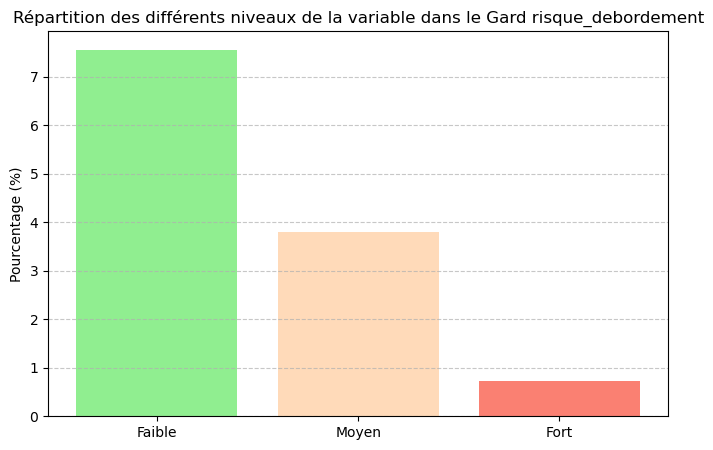

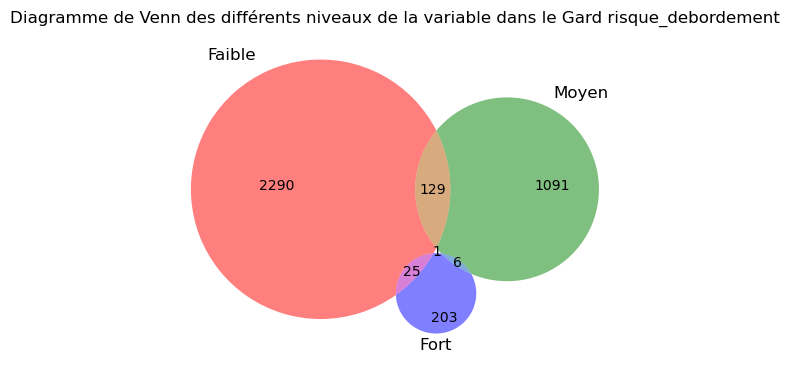

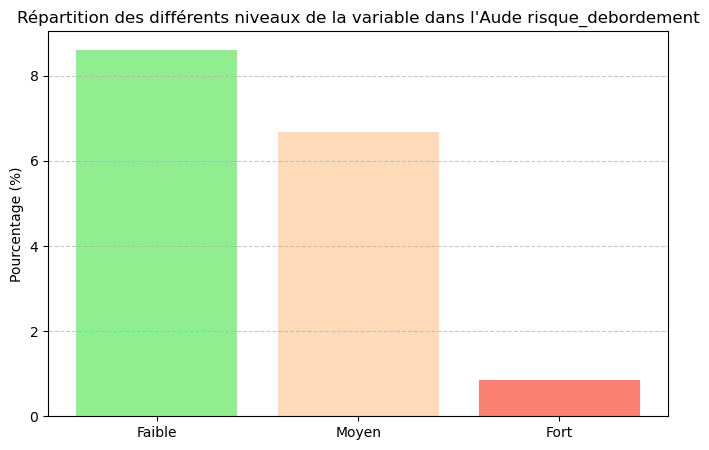

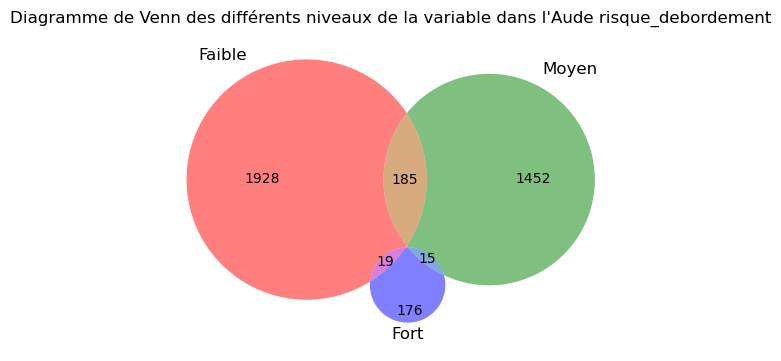

In [31]:
visualisation_risques(dvf_mairie, "risque_debordement", True)

En tout cas, un point positif : Cela semble être la même logique pour nos trois départements.

### 4.3 : Distribution de l'indicatrice de risque de submersion


[['Hérault', np.int64(42261), np.int64(2304)], ['Gard', np.int64(31811), np.int64(521)], ['Aude', np.int64(23990), np.int64(764)]]


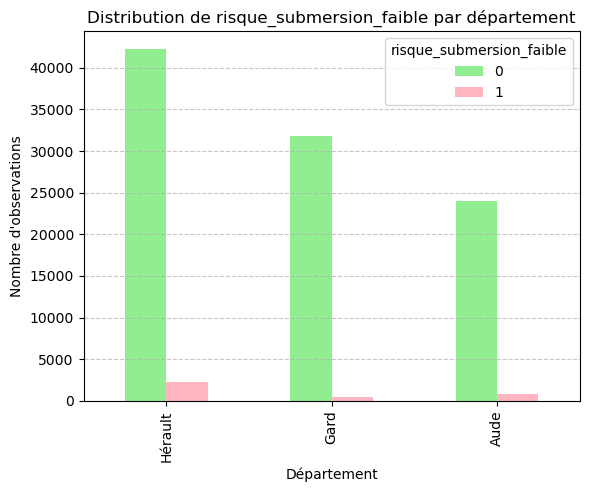

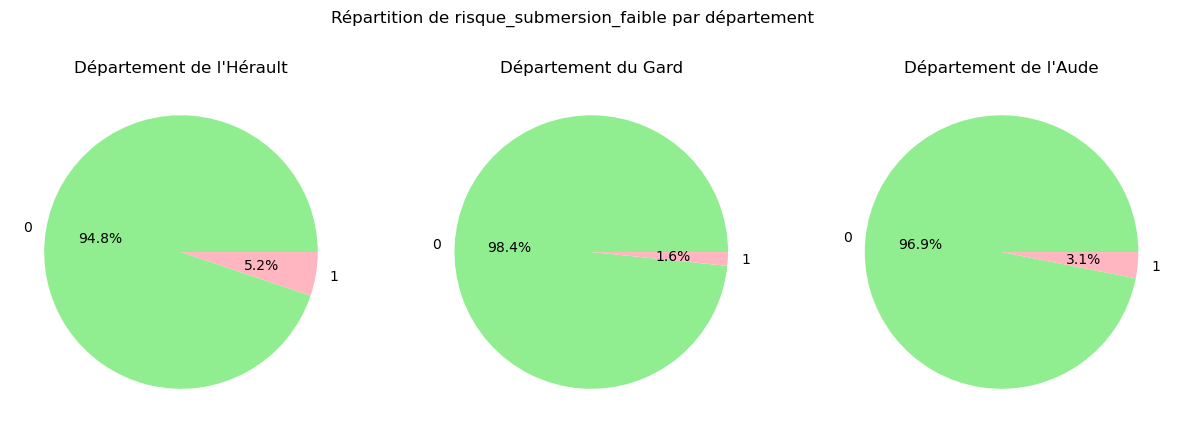

In [35]:
distribution(dvf_mairie,"risque_submersion_faible", True, False)

[['Hérault', np.int64(43232), np.int64(1333)], ['Gard', np.int64(32013), np.int64(319)], ['Aude', np.int64(24124), np.int64(630)]]


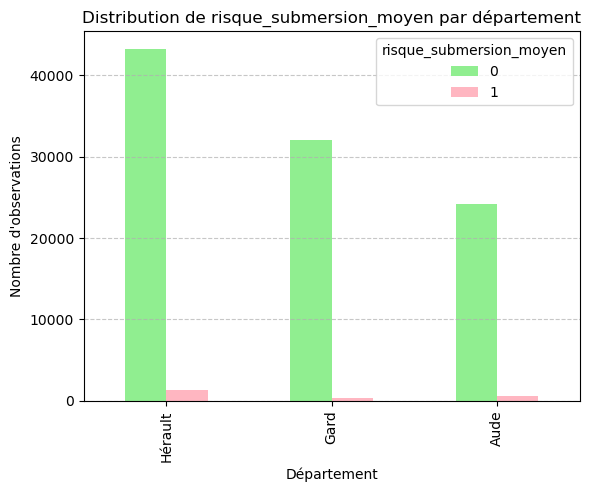

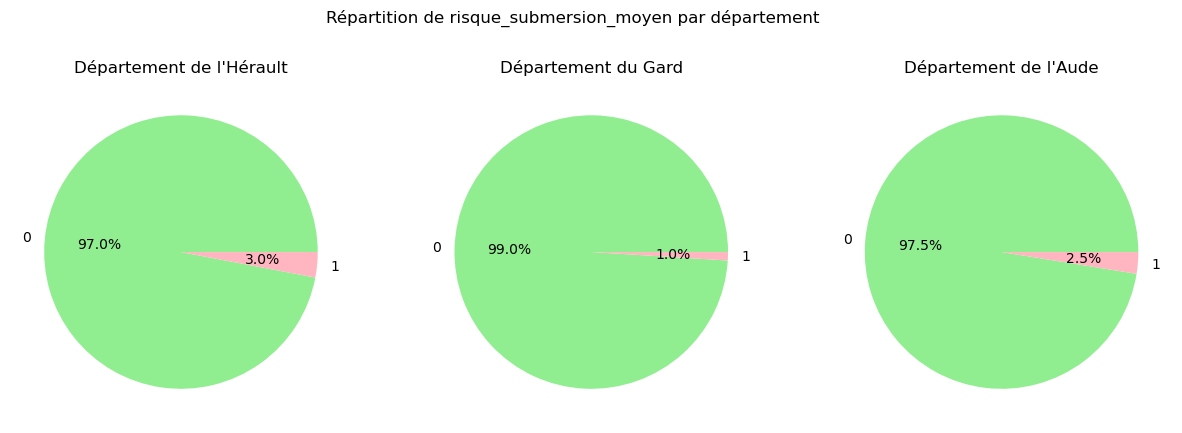

In [36]:
distribution(dvf_mairie,"risque_submersion_moyen", True, False)

[['Hérault', np.int64(44253), np.int64(312)], ['Gard', np.int64(32321), np.int64(11)], ['Aude', np.int64(24690), np.int64(64)]]


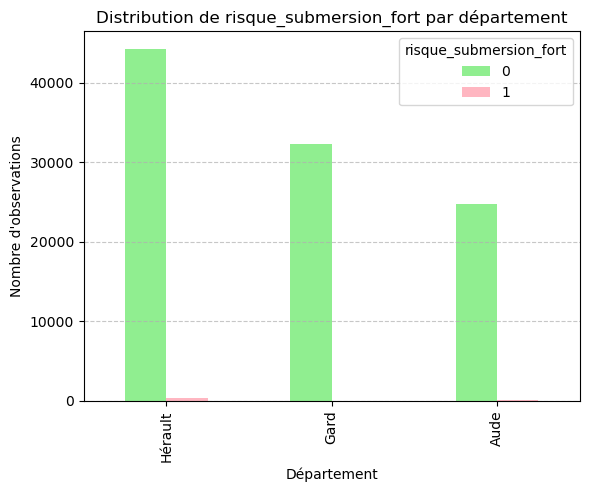

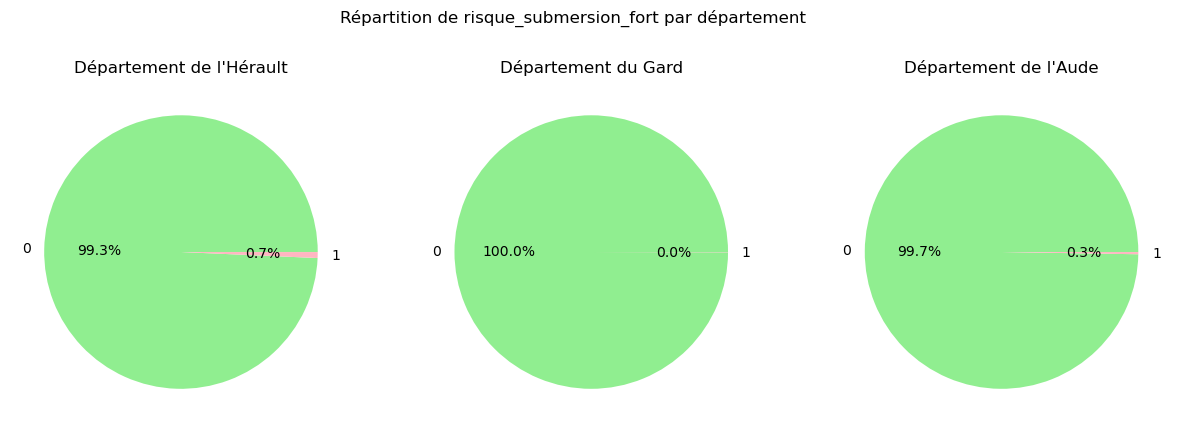

In [37]:
distribution(dvf_mairie,"risque_submersion_fort", True, False)

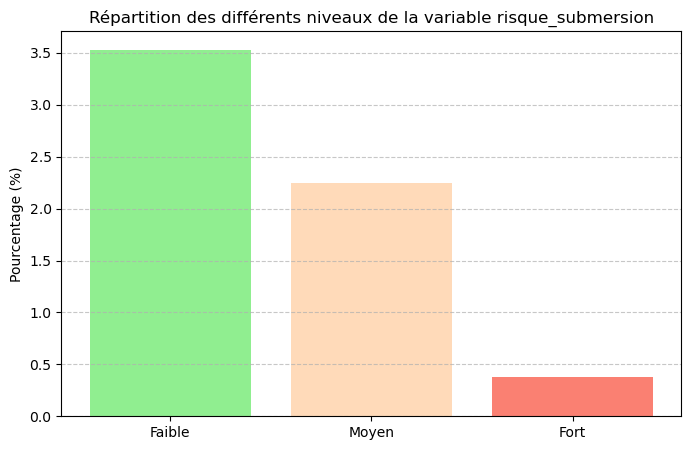

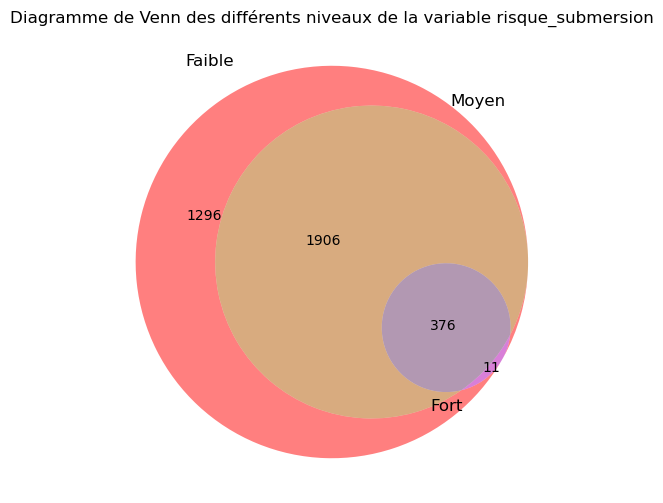

In [39]:
visualisation_risques(dvf_mairie, "risque_submersion", False)

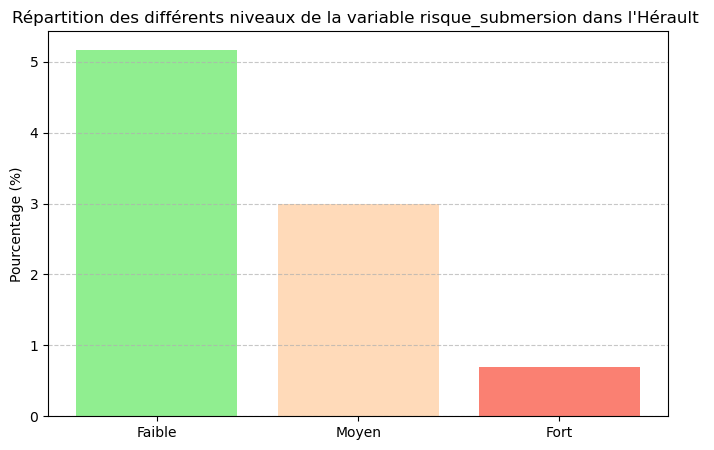

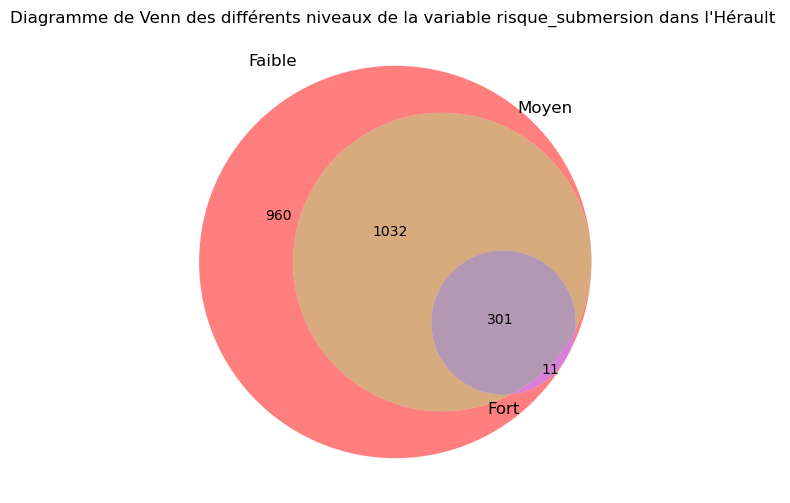

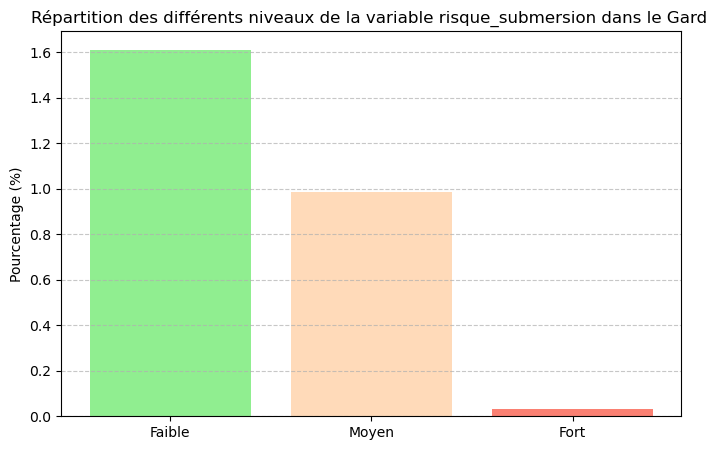

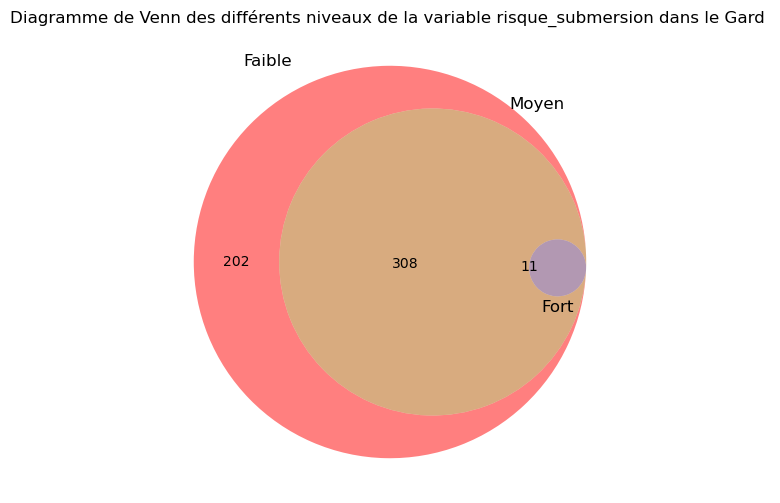

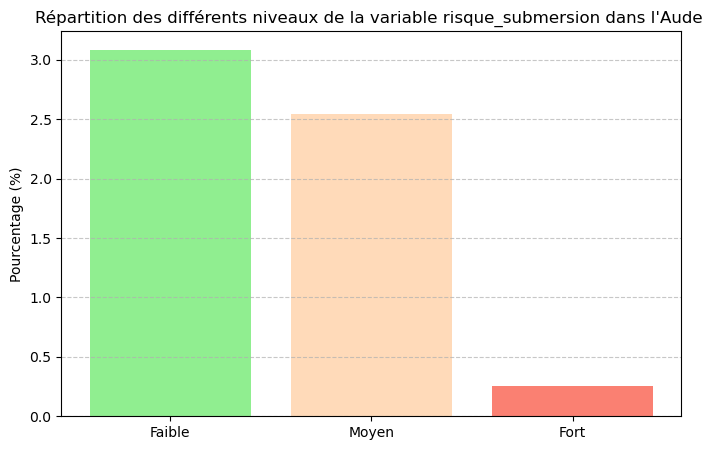

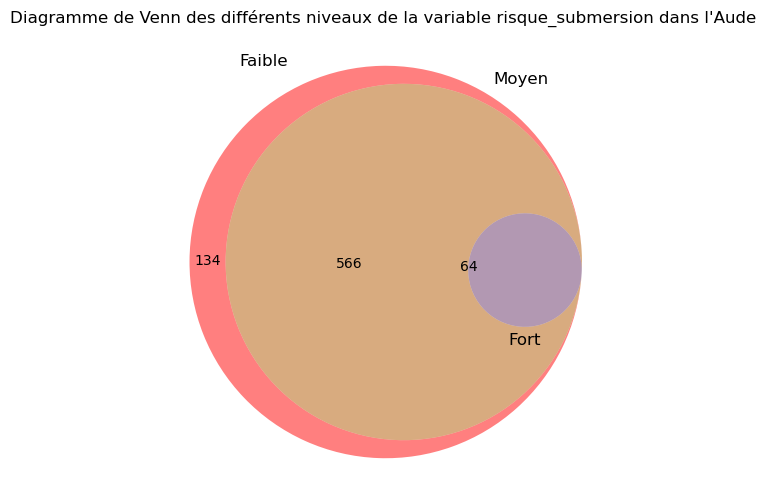

In [44]:
visualisation_risques(dvf_mairie, "risque_submersion", True)

Ici, on obtient un résultat nettement différent du risque de débordement : Les niveaux de risque de submersion sont inclus par ordre d'importance.

De plus, on peut noter que la proportion de ces risques dans notre base de données est assez faible, et même égale à 0 dans le cas du risque fort du département du Gard